In [1]:
# Import modules
import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

today = dt.date.today()
this_month = pd.to_datetime(str(today.year)+'-'+str(today.month)+'-01')
%qtconsole

In [2]:
# Define local directories
master_dir = 'C:\\Users\\Bryan\\OneDrive\\02 GitHub\\rig-count_L48\\'
data_raw_dir = 'C:\\Users\\Bryan\\OneDrive\\02 GitHub\\rig-count_L48\\data\\raw\\'
data_interim_dir = 'C:\\Users\\Bryan\\OneDrive\\02 GitHub\\rig-count_L48\\data\\interim\\'
data_processed_dir = 'C:\\Users\\Bryan\\OneDrive\\02 GitHub\\rig-count_L48\\data\\processed\\'
data_external_dir = 'C:\\Users\\Bryan\\OneDrive\\02 GitHub\\rig-count_L48\\data\\external\\'

In [3]:
# Load csv into df
df = pd.read_csv(data_interim_dir + 'merged_data_weekly_class.csv',parse_dates=['date'])
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')

# Remove basin rig counts
df = df.iloc[:,5:]

# Filter values for only past months
df = df[df.index < this_month]
df = df.reset_index()
df.head()

,date,Total US RigCount,wti_spot_lag_15,wti_spot_lag_9,wti_spot,brent_spot,wti_fut_1,wti_fut_2,wti_fut_3,wti_fut_4,...,opec_surp_capac,non-opec_tot_prod,oecd_cons_smooth,oecd_cons,non-oecd_cons_smooth,non-oecd_cons,world_cons_smooth,world_cons,rig_change_4bin_week+4,rig_change_4bin_week+8
0,2020-09-25,183.0,38.350,41.338,39.780,40.890,39.880,40.1300,40.4360,40.7640,...,7.094833,63.063193,41.338,43.702403,41.338,52.057515,41.338,95.759918,NaN,NaN
1,2020-09-18,179.0,37.872,40.570,39.554,40.770,39.556,39.8120,40.1560,40.5500,...,7.234639,62.993766,40.570,43.415251,40.570,52.199139,40.570,95.614390,NaN,NaN
2,2020-09-11,180.0,37.322,40.442,37.375,39.450,37.360,37.7275,38.1925,38.6775,...,7.374444,62.924340,40.442,43.128099,40.442,52.340763,40.442,95.468862,NaN,NaN
3,2020-09-04,181.0,34.185,39.992,41.842,43.060,41.604,41.9400,42.3080,42.6800,...,7.514249,62.854913,39.992,42.840947,39.992,52.482387,39.992,95.323334,NaN,NaN
4,2020-08-28,180.0,33.096,39.220,42.932,45.258,43.074,43.3740,43.6880,44.0000,...,7.576639,62.805609,39.220,42.732223,39.220,52.357322,39.220,95.089545,NaN,NaN


In [4]:
df.describe()

,Total US RigCount,wti_spot_lag_15,wti_spot_lag_9,wti_spot,brent_spot,wti_fut_1,wti_fut_2,wti_fut_3,wti_fut_4,usa_net_import_smooth,...,opec_tot_prod,opec_crud_capac,opec_surp_capac,non-opec_tot_prod,oecd_cons_smooth,oecd_cons,non-oecd_cons_smooth,non-oecd_cons,world_cons_smooth,world_cons
count,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,...,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000
mean,924.648810,70.233785,69.803595,68.946373,76.471579,68.997393,69.342983,69.575608,69.728097,6.716356,...,35.217989,32.293275,2.292931,60.397947,69.803595,46.327183,69.803595,48.915485,69.803595,95.242668
std,391.310448,23.738373,23.882964,24.041636,28.667405,23.978950,23.604010,23.292323,23.019254,1.785249,...,1.867283,0.786195,1.377869,3.711486,23.882964,1.873779,23.882964,3.384904,23.882964,4.367479
min,172.000000,3.324000,3.324000,3.324000,14.236000,3.920000,19.070000,22.670000,24.834000,1.997500,...,27.242429,29.738710,0.798167,54.124040,3.324000,35.126337,3.324000,41.998207,3.324000,81.065915
25%,667.750000,50.342000,49.973000,49.073500,52.209500,49.098500,49.693500,50.236500,50.734500,6.004813,...,34.496668,31.719937,1.646406,57.409606,49.973000,45.872881,49.973000,46.126860,49.973000,91.871262
50%,836.500000,63.785000,62.415000,61.319250,67.411000,61.270000,61.337000,61.315000,61.088000,7.206625,...,35.323721,32.303060,2.033655,60.896024,62.415000,46.568101,62.415000,49.269186,62.415000,95.189715
75%,1355.500000,93.926000,93.926000,93.926000,108.401000,93.948000,93.974000,94.450500,94.598500,7.776938,...,36.515473,32.763135,2.497515,62.533802,93.926000,47.407624,93.926000,51.717642,93.926000,99.169346
max,1609.000000,112.296000,112.296000,112.296000,126.624000,112.808000,113.302000,113.578000,113.692000,9.474250,...,37.737702,33.946000,9.087111,67.705728,112.296000,48.923817,112.296000,54.785057,112.296000,102.660965


In [5]:
num_col_rig_change = df.columns.str.contains('rig_change_4bin_week').sum()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    504 non-null    datetime64[ns]
 1   Total US RigCount       504 non-null    float64       
 2   wti_spot_lag_15         504 non-null    float64       
 3   wti_spot_lag_9          504 non-null    float64       
 4   wti_spot                504 non-null    float64       
 5   brent_spot              504 non-null    float64       
 6   wti_fut_1               504 non-null    float64       
 7   wti_fut_2               504 non-null    float64       
 8   wti_fut_3               504 non-null    float64       
 9   wti_fut_4               504 non-null    float64       
 10  usa_net_import_smooth   504 non-null    float64       
 11  usa_net_import          504 non-null    float64       
 12  usa_stocks_all          504 non-null    float64   

In [6]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 6 to 503
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    498 non-null    datetime64[ns]
 1   Total US RigCount       498 non-null    float64       
 2   wti_spot_lag_15         498 non-null    float64       
 3   wti_spot_lag_9          498 non-null    float64       
 4   wti_spot                498 non-null    float64       
 5   brent_spot              498 non-null    float64       
 6   wti_fut_1               498 non-null    float64       
 7   wti_fut_2               498 non-null    float64       
 8   wti_fut_3               498 non-null    float64       
 9   wti_fut_4               498 non-null    float64       
 10  usa_net_import_smooth   498 non-null    float64       
 11  usa_net_import          498 non-null    float64       
 12  usa_stocks_all          498 non-null    float64   

Looks good! Let's get started.

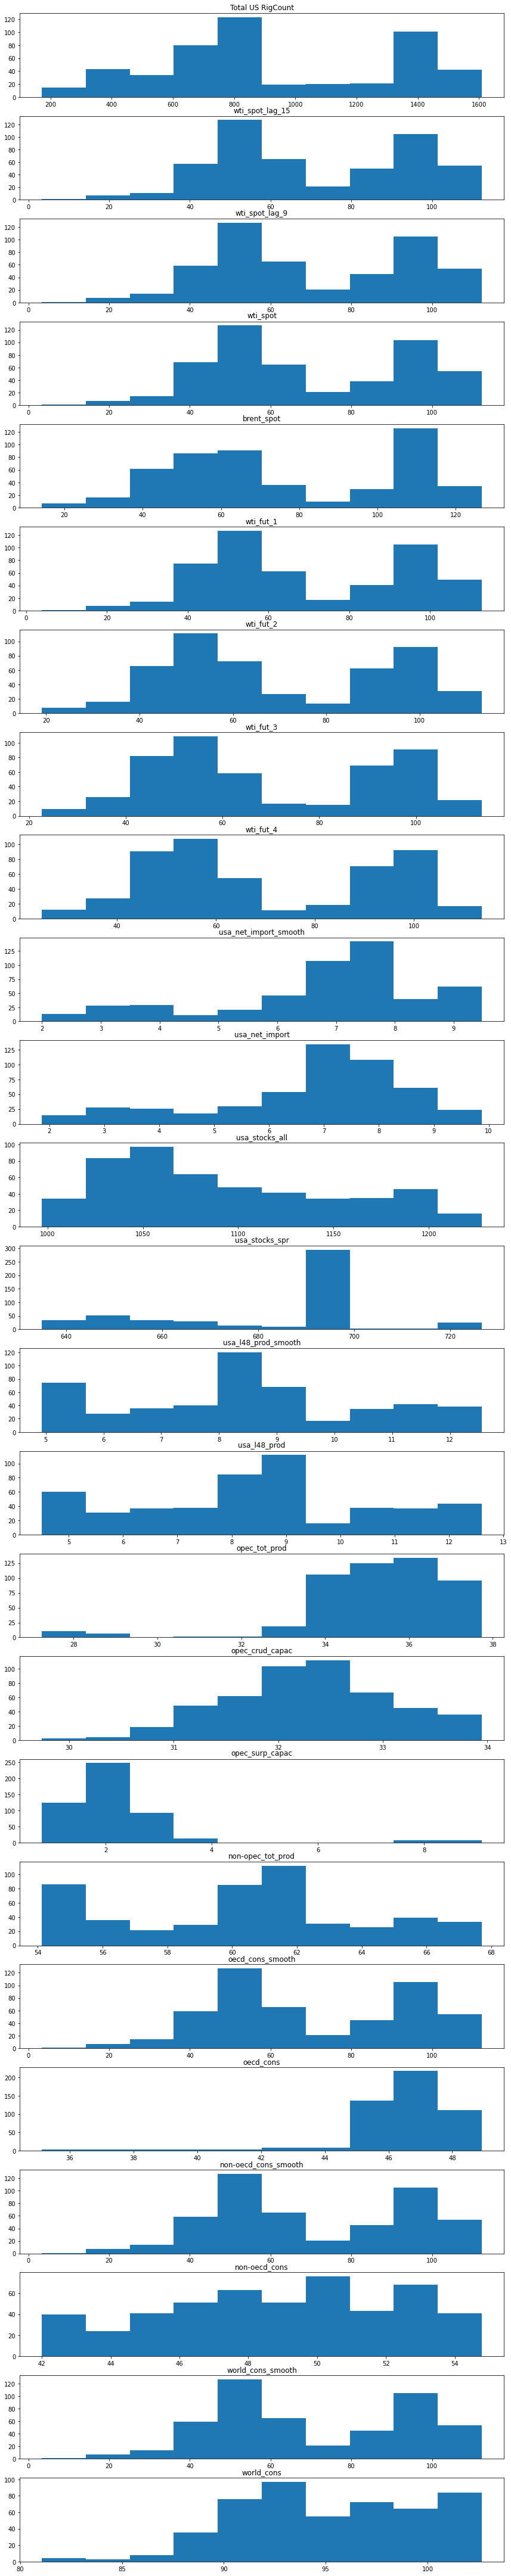

In [7]:
fig, ax = plt.subplots(len(df.columns)-1-num_col_rig_change,figsize=(12,60))
fig.tight_layout()
for i in range(1,len(df.columns)-num_col_rig_change):
    ax[i-1].hist(df.iloc[:,i])
    ax[i-1].set(title=df.columns[i])

## Train / Test Split
Define features X, and target variable y

In [8]:
X = df.iloc[:,2:]
y = df.iloc[:,-num_col_rig_change:]

Train / test split will be done using sklearn's train_test_split. Depending on what future week that will be tested, will need to index y appropriately.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y.iloc[:,1],test_size=0.33)

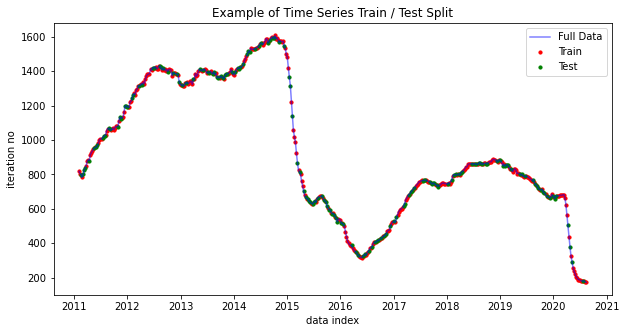

In [10]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(df.date,df['Total US RigCount'],c='b',alpha=0.5,label='Full Data')
ax.scatter(df.date[y_train.sort_index().index],df['Total US RigCount'][y_train.sort_index().index],c='r',alpha=1,s=10,label='Train')
ax.scatter(df.date[y_test.sort_index().index],df['Total US RigCount'][y_test.sort_index().index], c='g',alpha=1,s=10,label='Test')
      
ax.set(title='Example of Time Series Train / Test Split',xlabel='data index',ylabel='iteration no')
ax.legend()

In [11]:
# Save preprocessed file as CSV
df.to_csv(data_processed_dir+'processed_data_weekly_class.csv',index=False)